# <font color = 'paleyellow'><b>Support Vector Machines</b></font>

Support vector machine for binary classification
Support vector machine is a supervised machine learning algorithm which can be used for both classification or regression challenges. 

However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 
Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

---

## <font color = 'paleyellow'><b>Support vector Regression</b></font>

Support vector regression is a type of support vector machine that supports linear and non-linear regression. In simple regression we try to minimise the error rate. 

In SVR we try to fit the error within a certain threshold. This is called the margin of tolerance. The decision boundary is the hyperplane that maximises the margin between the two classes. The support vectors are the data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. The distance between the hyperplane and the support vectors is called the margin. Our goal is to choose a hyperplane with the greatest possible margin, so that the maximum number of data points can be classified correctly.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('D:\Python work\Machine learning revision\Classification\insurance.csv')

In [4]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1311,33,female,26.695,0,no,northwest,4571.41305
301,53,female,22.610,3,yes,northeast,24873.38490
377,24,male,40.150,0,yes,southeast,38126.24650
1251,19,male,19.800,0,no,southwest,1241.56500
486,54,female,21.470,3,no,northwest,12475.35130


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


---

## <font color = 'paleyellow'><b>Support vector classifier</b></font>

In [8]:
# support vector classifier is a binary classifier which classifies the data into two classes.
# it uses the concept of margin to classify the data. margin is the distance between the hyperplane and the nearest data point from either set.
# the goal is to choose a hyperplane with the maximum possible margin between support vectors in the given data set.

In [14]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [15]:
iris = load_iris()

In [16]:
X, y = iris.data[:, :2], iris.target
# taking only the first two features for simplicity

In [17]:
# spliting the data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [18]:
svc = SVC(kernel='linear').fit(Xtrain, ytrain)

In [20]:
ypred = svc.predict(Xtest)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(ytest, ypred)

0.8421052631578947

In [27]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = 'viridis')
    
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Z = Z.reshape(xx.shape)
    
    # Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Flattens the meshgrid coordinates using ravel() and concatenates them column-wise using np.c_ to create a 2D array 
    # where each row represents a point in the feature space.
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap = 'viridis')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVC on Iris')
    plt.show()    
    

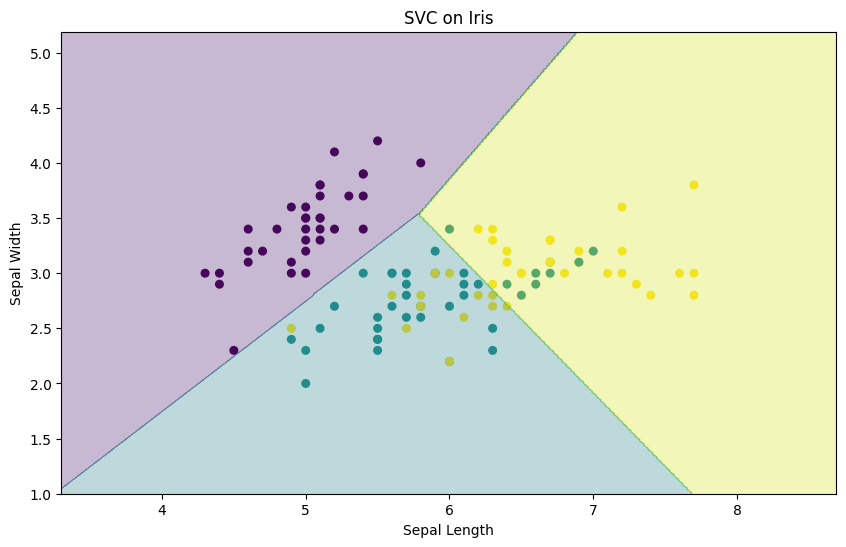

In [31]:
plot_decision_boundary(Xtrain, ytrain, svc)